In [2]:
import numpy as np
from path import Path
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import os
import sys
sys.path.append('../')
import random
from tool.data_io import get_data_paths,read_image, read_json, save_image, try_create_dir
from tool.plt_utils  import plt_samples

In [3]:
def set_labels(label_file):
    labels = read_json(label_file)
    label_ids = set()
    label_names = set()
    for species in labels.keys():
        for (idx, item) in labels[species].items():
            label_ids.add(item['number'])
            label_names.add(item['label'])
    return labels

def get_acts(phase='validation',
            data_type='init_s1r95p05_mask',
            partition=read_json('../../stats/partition_clean_tileW512H512M4_stage.json'), 
             root_leaves=Path('/usr/xtmp/xs75/leaves/datasets/tiles/clean_tilesW512H512M4/'), 
             root_acts=Path('/usr/xtmp/xs75/leaves/datasets/acts/tile'),
             labels_map=set_labels('../../stats/label_file_common_binary.json')
            ):

    root=root_acts
    pos_acts = []
    neg_acts = []
    id2paths = partition[phase]['tiles']

    for path in tqdm(glob(root/phase/f'*/{data_type}/*/*.npy')):
    #         print(path)
    #         id_ = os.path.join(*path.split('/')[-2:]).split('.')[0]
    #         id_ = os.path.join(path.split('/')[-3], path.split('/')[-1]).split('.')[0]
        
        id_ = os.path.join(path.split('/')[-4:][0], (path.split('/')[-4:][-1]).split('.')[0] )
        if id_ not in id2paths.keys(): 
            continue
        label, _ = read_image(root_leaves/id2paths[id_]['label'])
        species = id_.split('/')[0]
        for key, value in labels_map[species].items():
            label[label == int(key)] = value['number']
            
#         leaf_mask, _ = read_image(root_leaves/id2paths[id_]['leaf_mask'])
#         mask, _ = read_image(root_leaves/id2paths[id_]['s1r95p05_mask'])
#         act = np.load(path)
#         focus = np.logical_and(leaf_mask!=0, mask!=0)
#         focus = mask!=0
#         index_pos = np.logical_and(label!=0, focus)
#         index_neg = np.logical_and(label==0, focus)
#         pos_acts += list(act[index_pos])
#         neg_acts += list(act[index_neg])

        act = np.load(path)
        pos_acts += list(act[label!=0])
        neg_acts += list(act[label==0])
    return pos_acts,neg_acts

In [6]:
# epoch=2
# pos_acts_val, neg_acts_val= get_acts(data_type=f'e{epoch}_s1r95p05_mask')
# pos_acts_val = np.array(pos_acts_val)
# neg_acts_val = np.array(neg_acts_val)
# np.save(f'./z_hist/all_pos_acts_e{epoch}.npy', pos_acts_val)
# np.save(f'./z_hist/all_neg_acts_e{epoch}.npy', neg_acts_val)

3694216
3686238


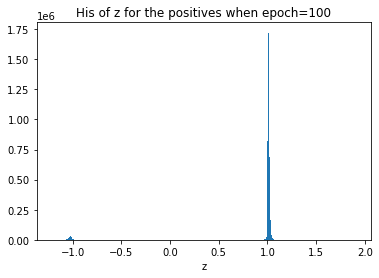

In [4]:
epoch=100
pos_acts_val = np.load(f'./z_hist/all_pos_acts_e{epoch}.npy')
print(len(pos_acts_val))
index_=(pos_acts_val>-1.5)
print(len(pos_acts_val[index_]))
plt.title(f'His of z for the positives when epoch={epoch}')
_ = plt.hist(pos_acts_val[index_],bins=300,density=False, align='mid')
plt.xlabel('z')
plt.show()

1243062648
530995540


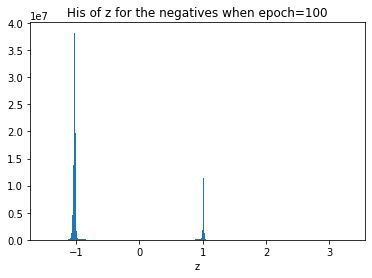

In [6]:
neg_acts_val = np.load(f'./z_hist/all_neg_acts_e{epoch}.npy')
print(len(neg_acts_val))
index_=(neg_acts_val>-1.5)
print(len(neg_acts_val[index_]))
# neg_acts_val = neg_acts_val[index_]
neg_acts_val = np.random.choice(neg_acts_val[index_], int(1e8))
plt.title(f'His of z for the negatives when epoch={epoch}')
_ = plt.hist(neg_acts_val,bins=300,density=False, align='mid')
plt.xlabel('z')
plt.show()

In [11]:
# plt.title('Histrogram of z value for the negatives')
# _ = plt.hist(neg_acts_val,bins=500,density=False,align='mid')
# plt.xlabel('z')
# plt.show()

In [12]:
# plt.title('Histrogram of z value for the positives')
# _ = plt.hist(random.choices(pos_acts_val , k = 5000000),bins=50,density=False, align='mid')
# plt.xlabel('z')
# plt.title('Histrogram of z value for the negatives')
# _ = plt.hist(random.choices(neg_acts_val, k = 5000000),bins=50,density=False,align='mid')
# plt.xlabel('z')


# Image Level Visualization






  0%|          | 0/38 [00:00<?, ?it/s]

quercus-lobata/00000380_3599627


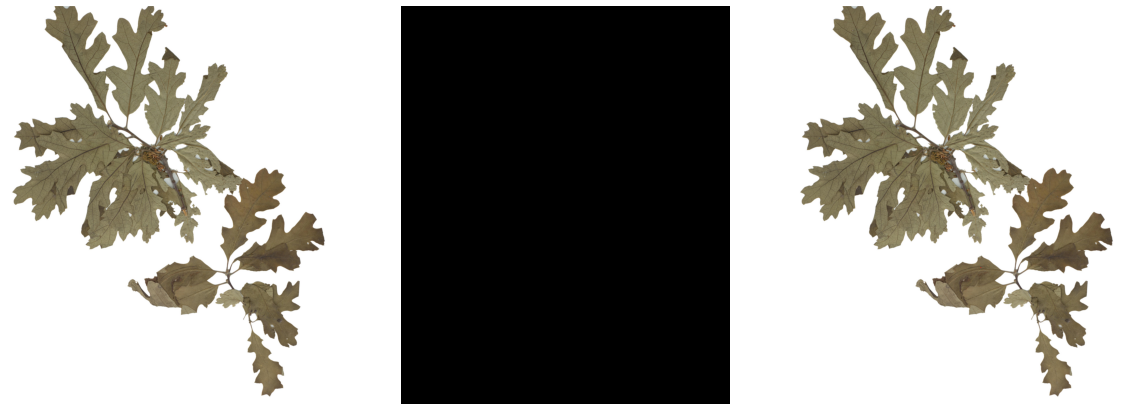






  3%|▎         | 1/38 [00:05<03:33,  5.78s/it]

quercus-lobata/00000157_1314798


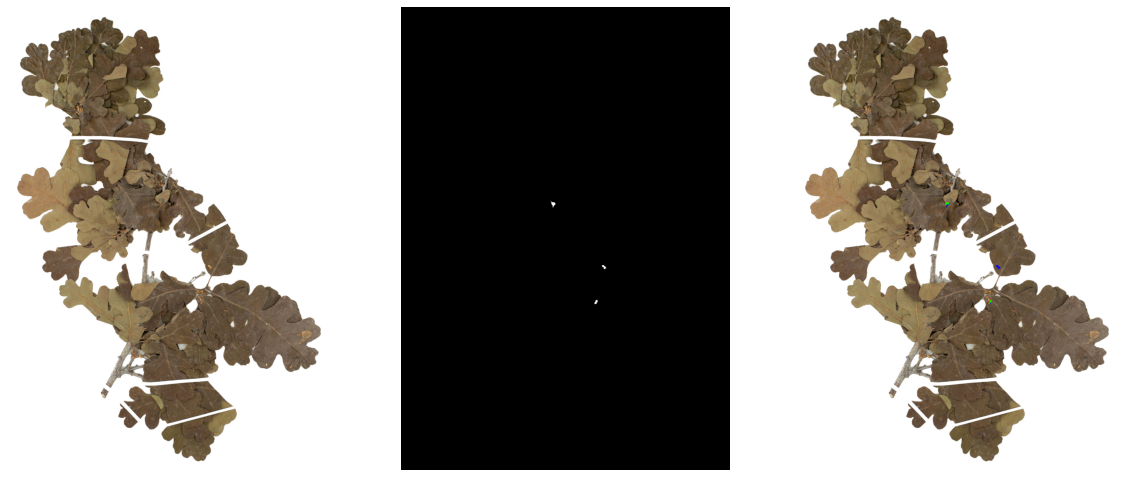






  5%|▌         | 2/38 [00:12<03:40,  6.12s/it]

quercus-lobata/00000294_1619815


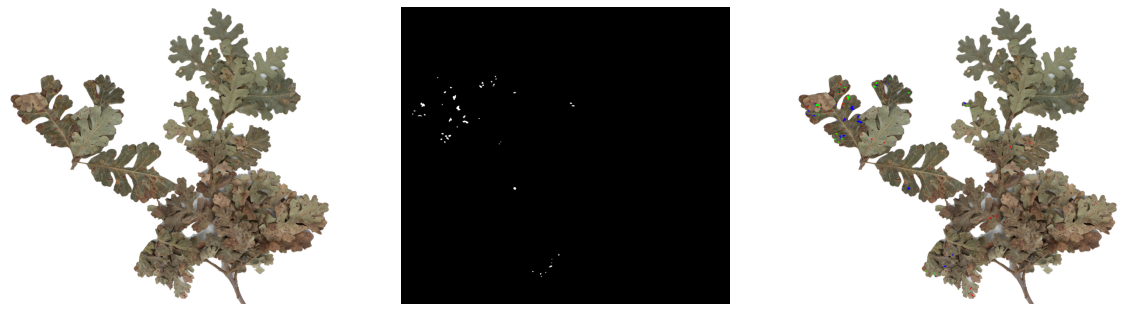






  8%|▊         | 3/38 [00:16<03:07,  5.35s/it]

quercus-lobata/00000144_1314778


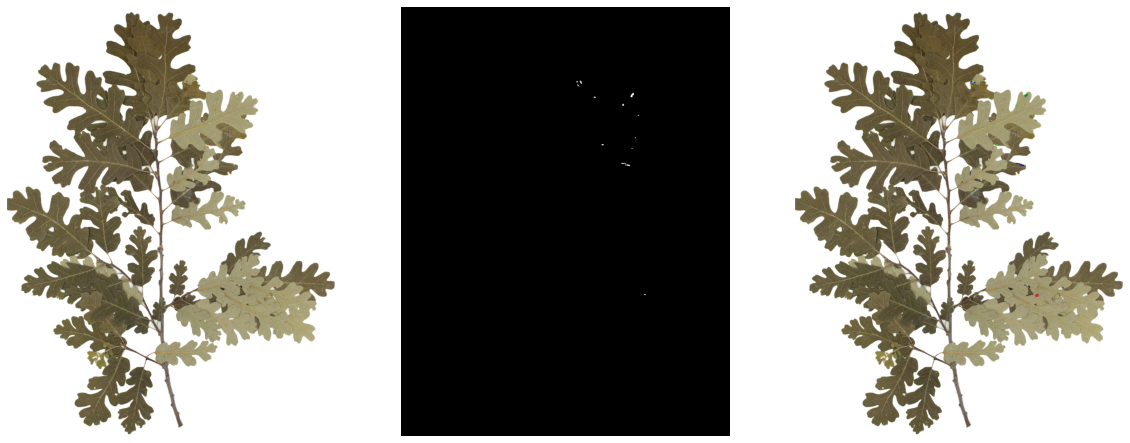






 11%|█         | 4/38 [00:22<03:10,  5.59s/it]

quercus-lobata/00000074_329344


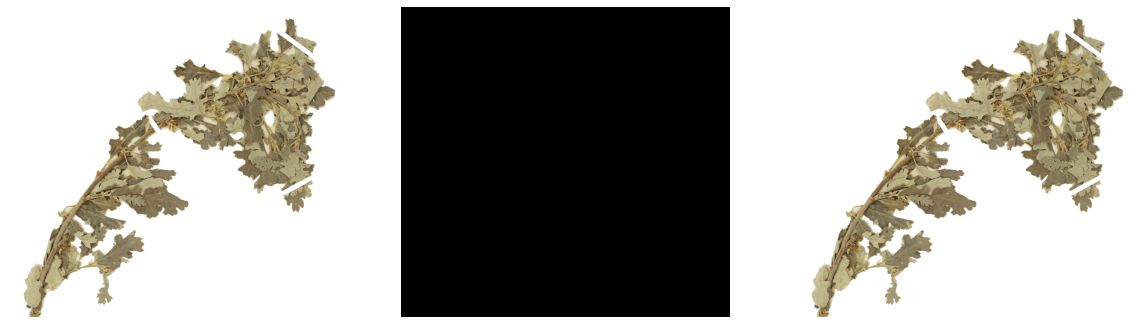






 13%|█▎        | 5/38 [00:26<02:50,  5.17s/it]

quercus-lobata/00000293_1619758


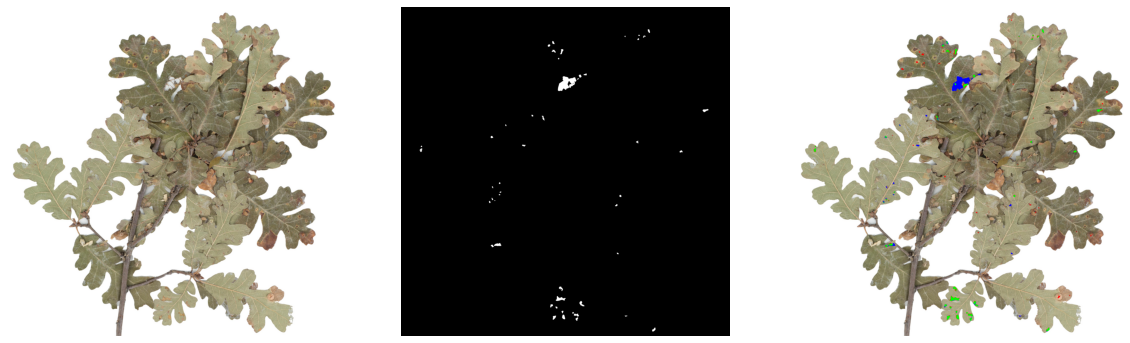






 16%|█▌        | 6/38 [00:29<02:27,  4.62s/it]

quercus-lobata/00000299_1652561


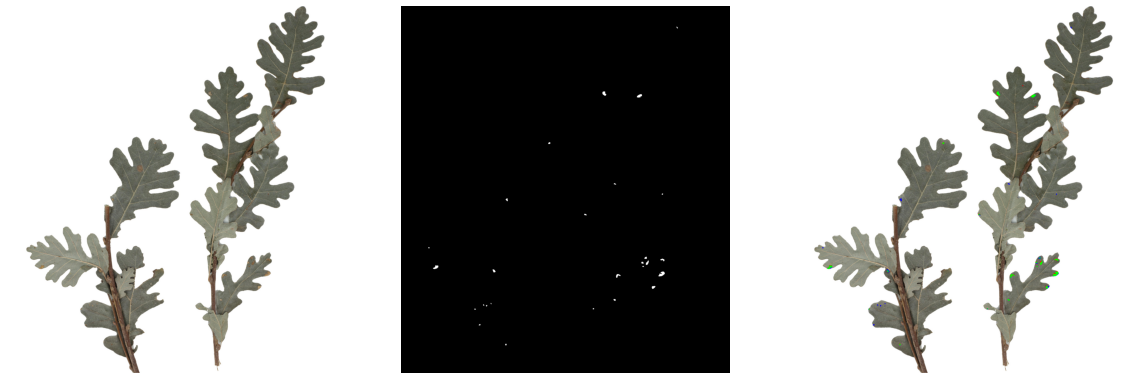






 18%|█▊        | 7/38 [00:34<02:24,  4.68s/it]

quercus-lobata/00000309_1674009


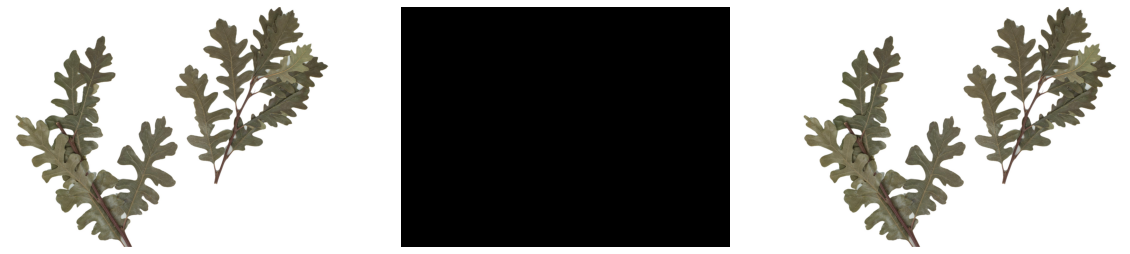






 21%|██        | 8/38 [00:37<02:05,  4.17s/it]

quercus-lobata/00000258_1406286


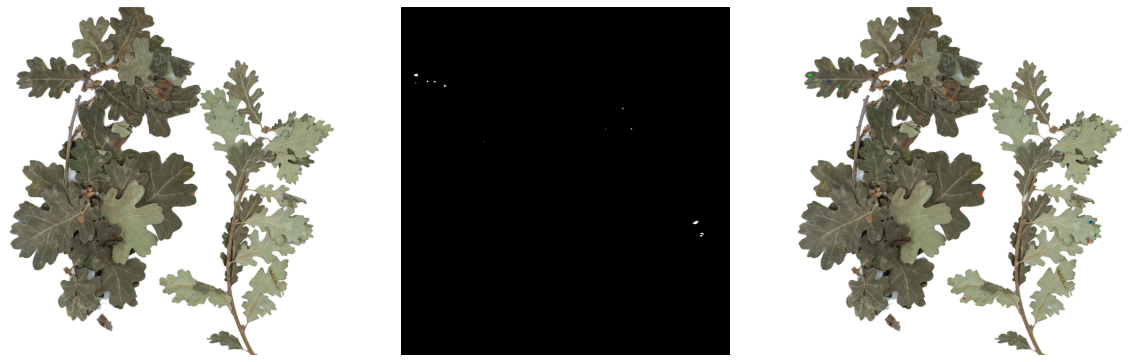






 24%|██▎       | 9/38 [00:43<02:17,  4.74s/it]

quercus-lobata/00000310_1676544


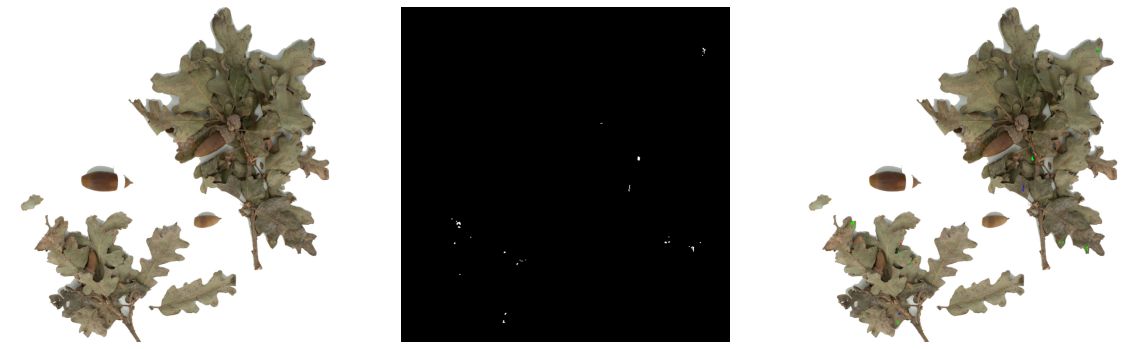






 26%|██▋       | 10/38 [00:47<02:06,  4.52s/it]

quercus-lobata/00000122_1314753


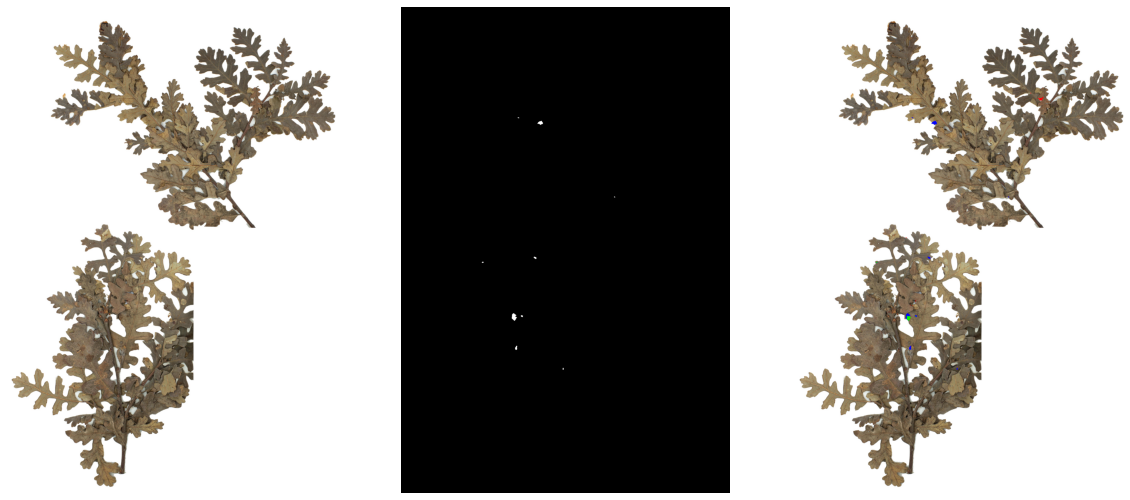






 29%|██▉       | 11/38 [00:55<02:24,  5.35s/it]

quercus-lobata/00000181_1314822


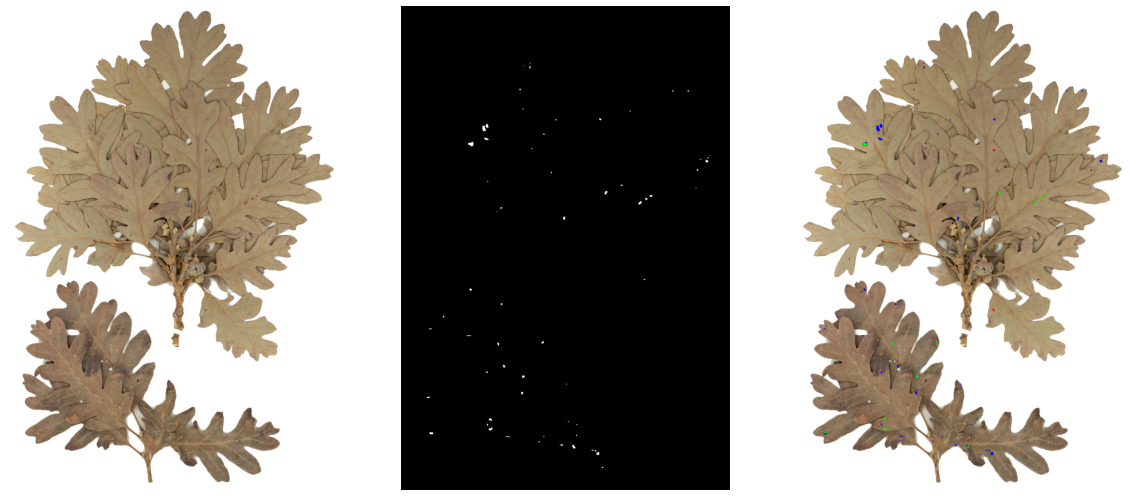






 32%|███▏      | 12/38 [01:00<02:19,  5.37s/it]

quercus-lobata/00000131_1314762


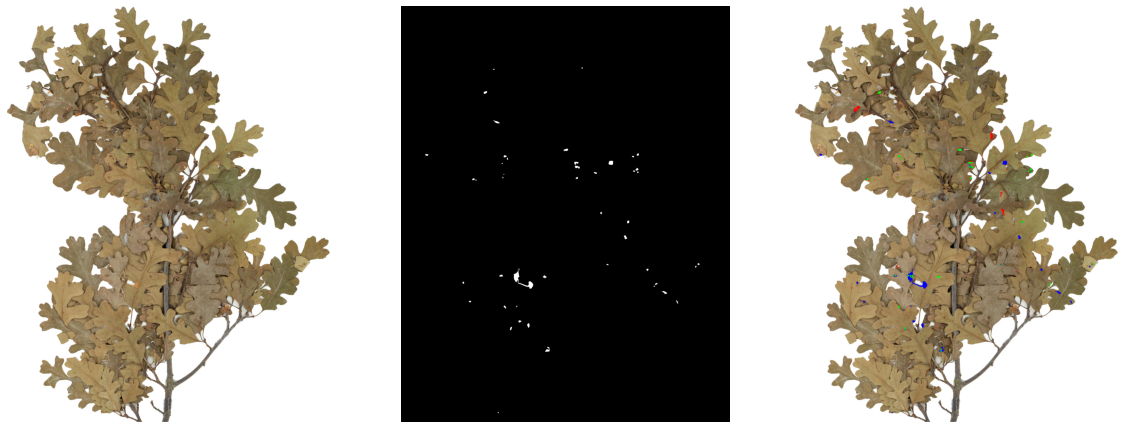






 34%|███▍      | 13/38 [01:06<02:19,  5.58s/it]

quercus-lobata/00000014_202088


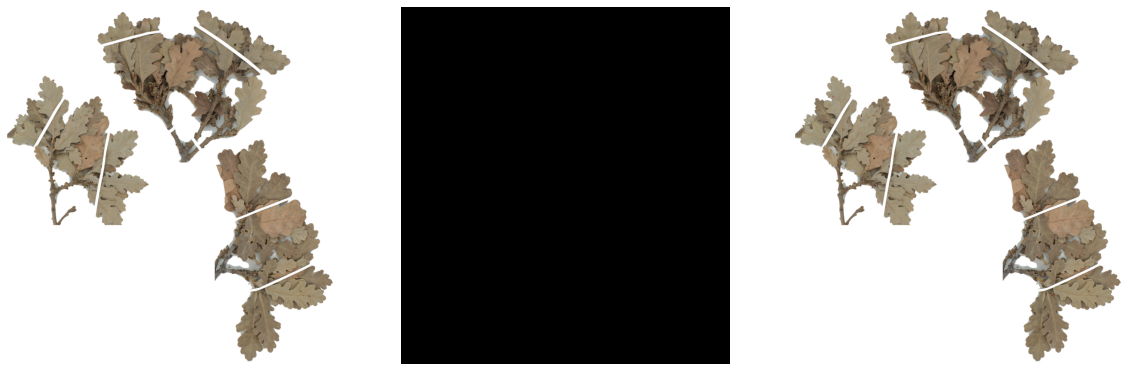






 37%|███▋      | 14/38 [01:15<02:34,  6.45s/it]

quercus-lobata/00000196_1314837


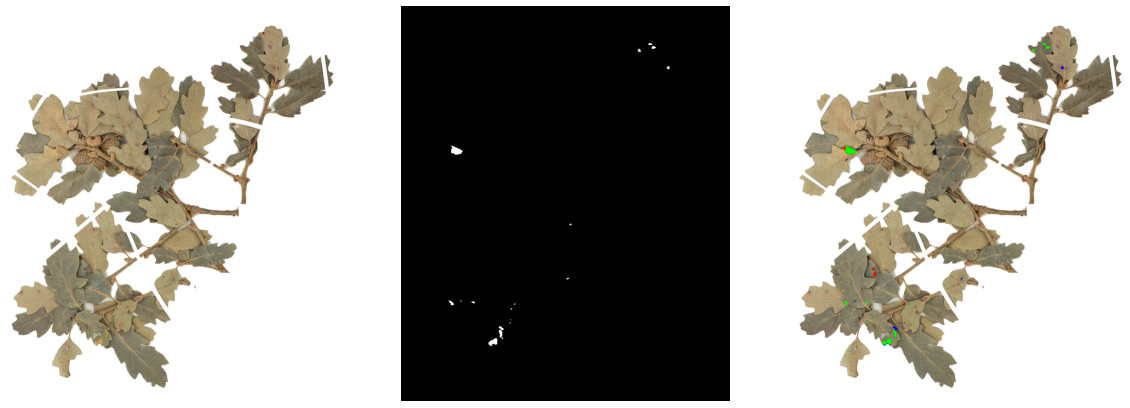






 39%|███▉      | 15/38 [01:19<02:14,  5.83s/it]

quercus-lobata/00000325_1823542


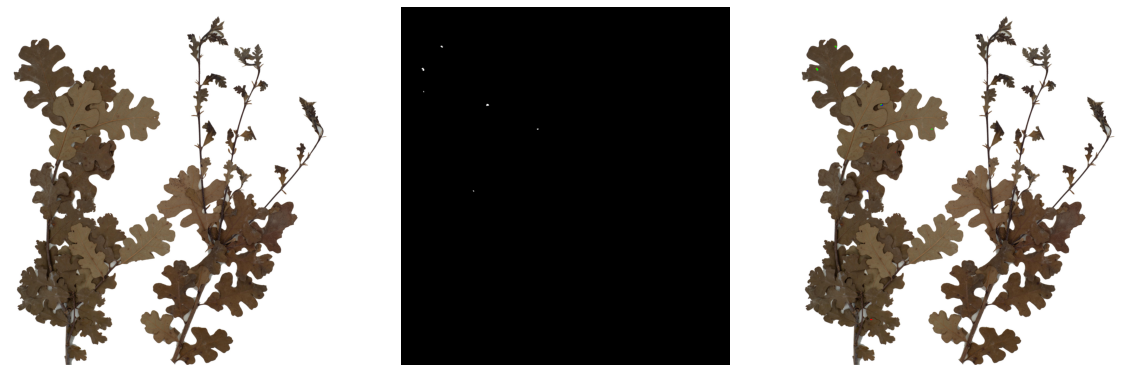






 42%|████▏     | 16/38 [01:26<02:15,  6.15s/it]

quercus-lobata/00000070_329340


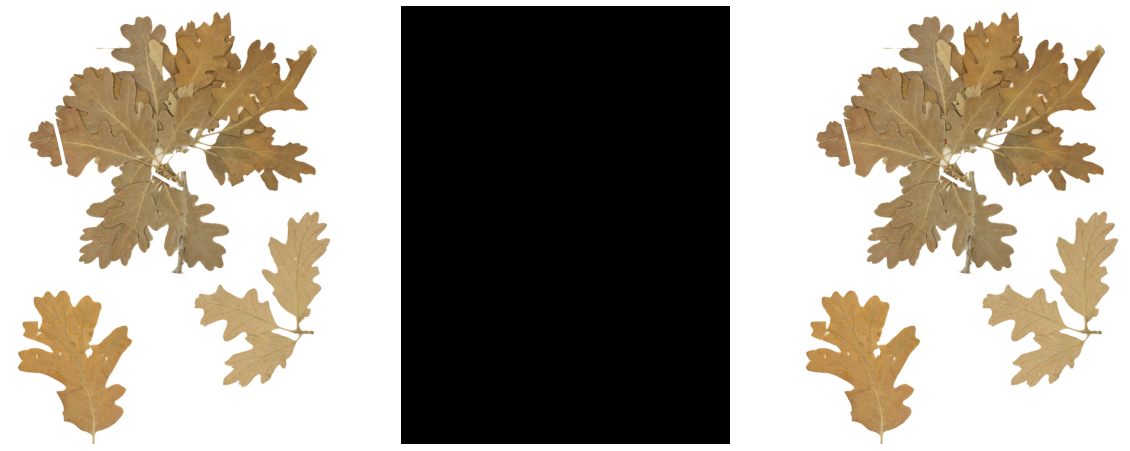






 45%|████▍     | 17/38 [01:31<02:01,  5.80s/it]

quercus-lobata/00000385_3819211


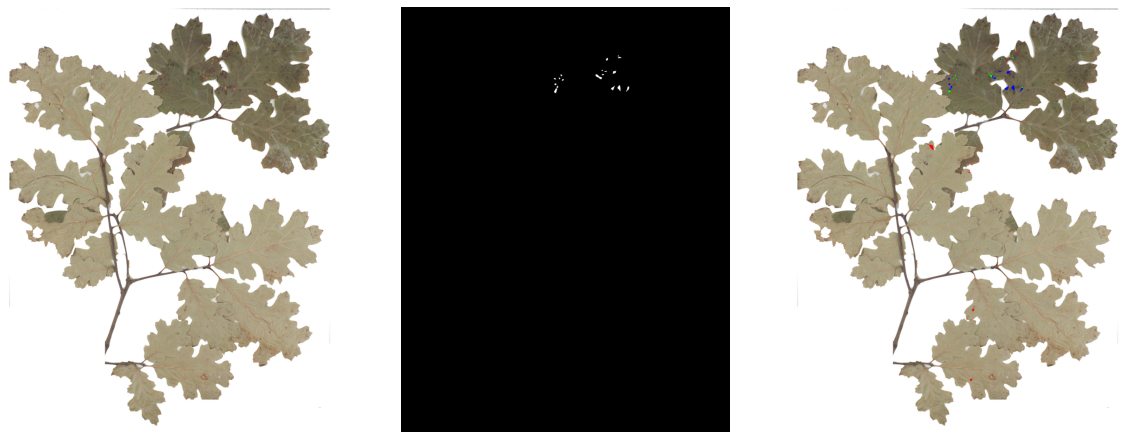






 47%|████▋     | 18/38 [01:39<02:11,  6.59s/it]

quercus-lobata/00000374_3142053


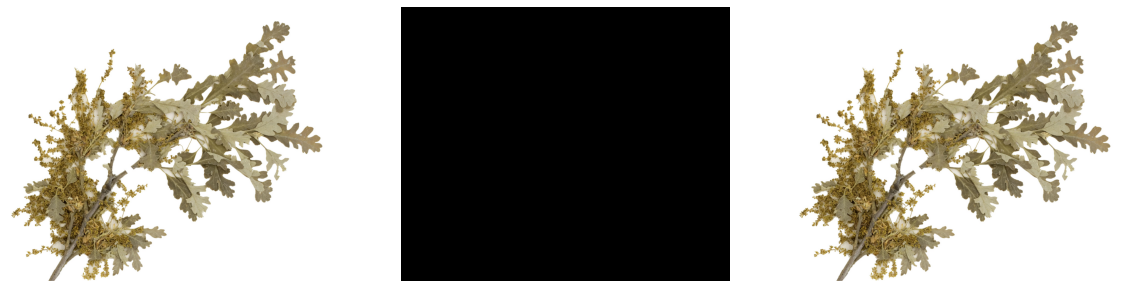






 50%|█████     | 19/38 [01:42<01:43,  5.42s/it]

quercus-lobata/00000175_1314816


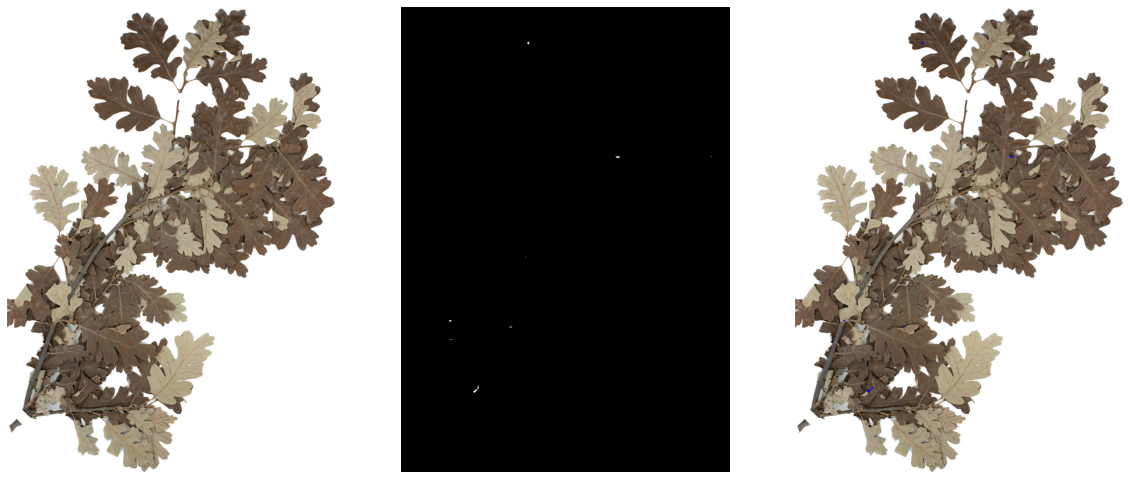






 53%|█████▎    | 20/38 [01:50<01:52,  6.27s/it]

quercus-lobata/00000353_2395478


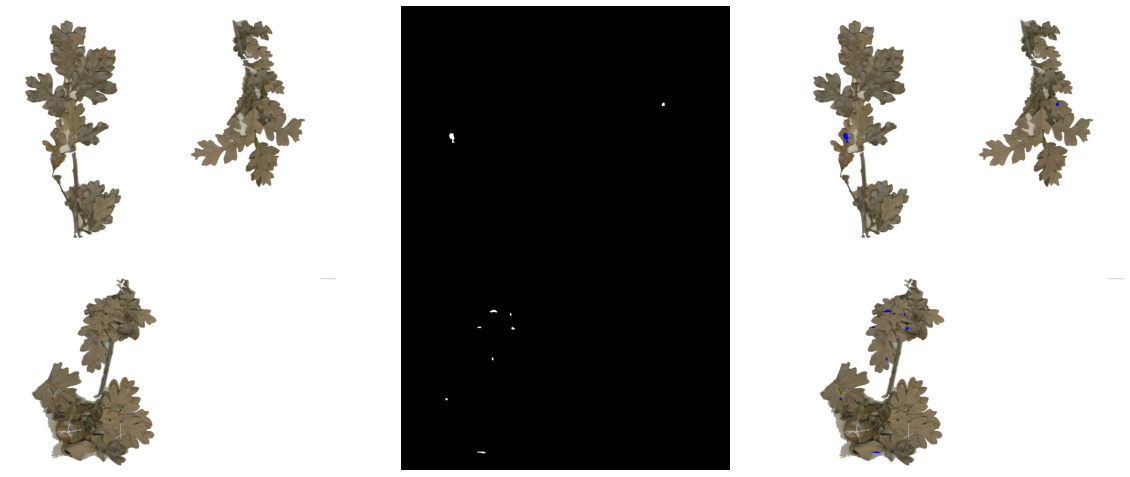






 55%|█████▌    | 21/38 [01:53<01:28,  5.19s/it]

quercus-lobata/00000314_1688426


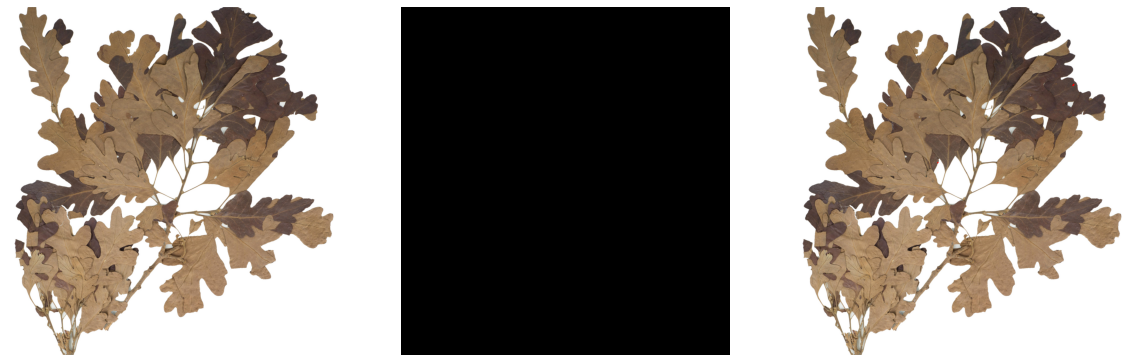






 58%|█████▊    | 22/38 [01:59<01:26,  5.40s/it]

quercus-lobata/00000079_609829


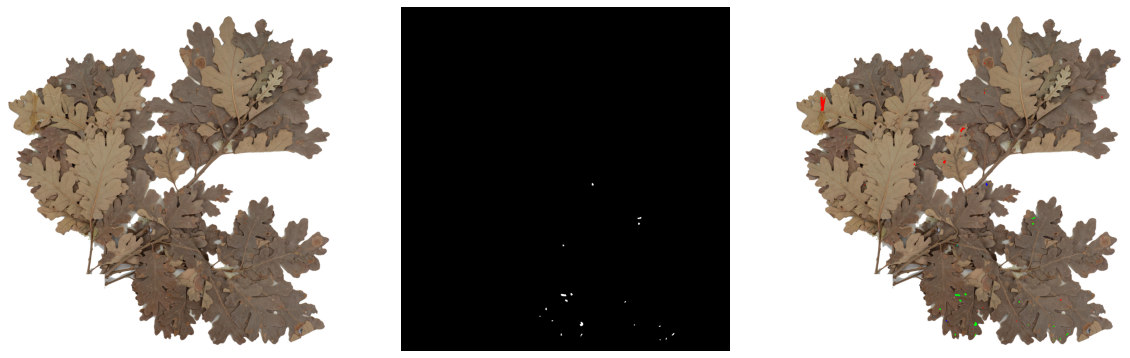






 61%|██████    | 23/38 [02:09<01:40,  6.73s/it]

quercus-lobata/00000029_251772


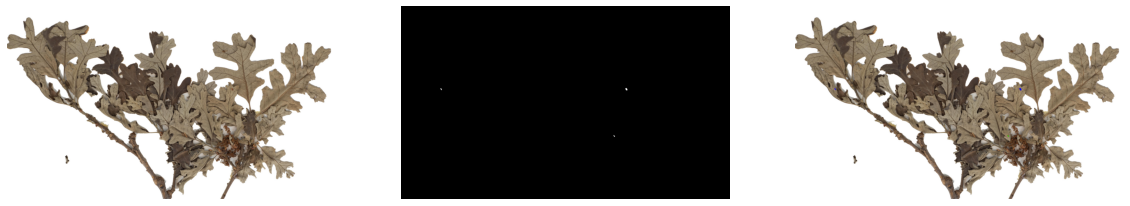






 63%|██████▎   | 24/38 [02:14<01:29,  6.43s/it]

quercus-lobata/00000160_1314801


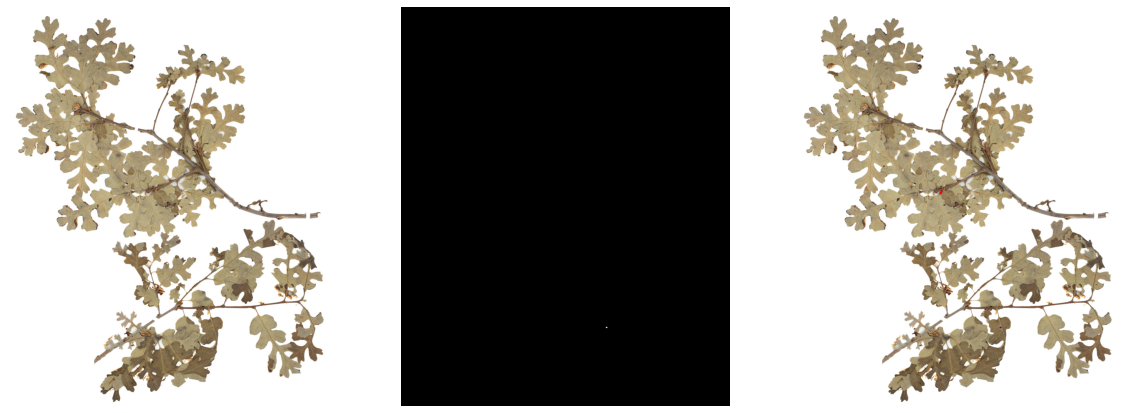






 66%|██████▌   | 25/38 [02:21<01:23,  6.41s/it]

quercus-lobata/00000283_1604902


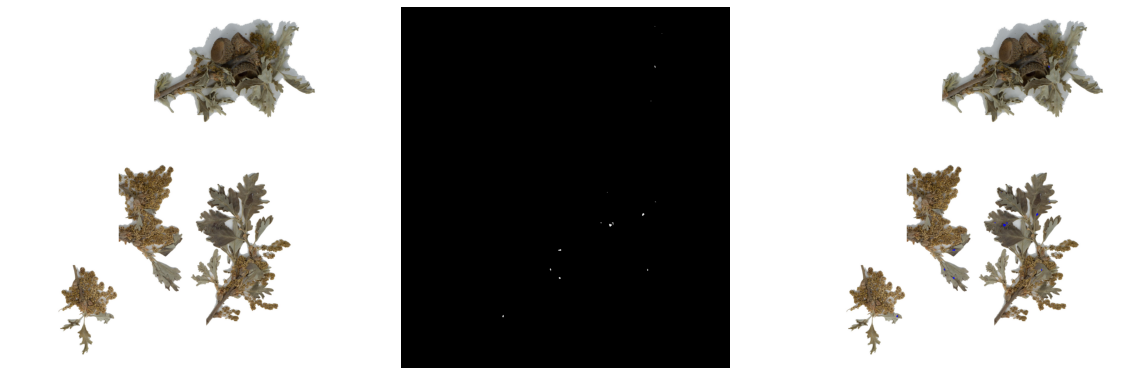






 68%|██████▊   | 26/38 [02:25<01:10,  5.89s/it]

quercus-lobata/00000378_3509201


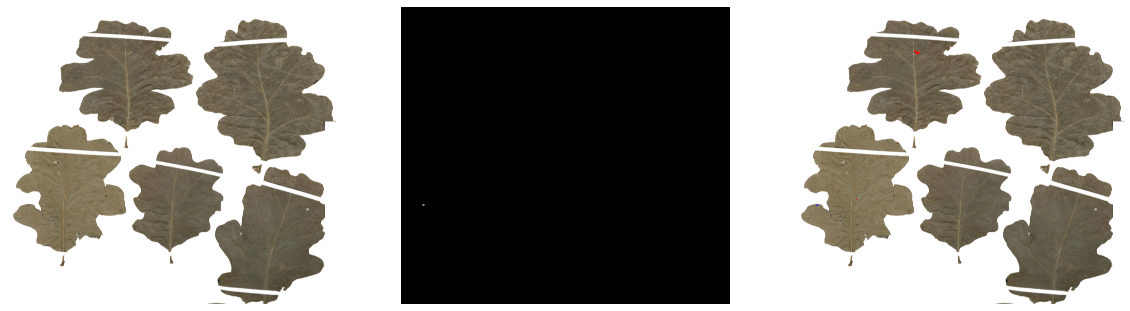






 71%|███████   | 27/38 [02:36<01:21,  7.45s/it]

quercus-lobata/00000341_2066513


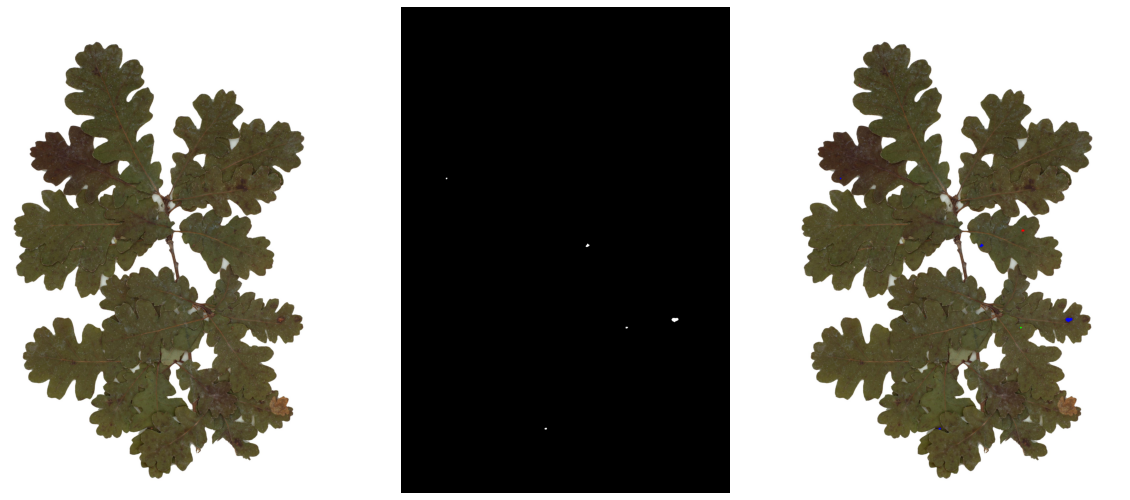






 74%|███████▎  | 28/38 [02:40<01:02,  6.21s/it]

quercus-lobata/00000237_1333896


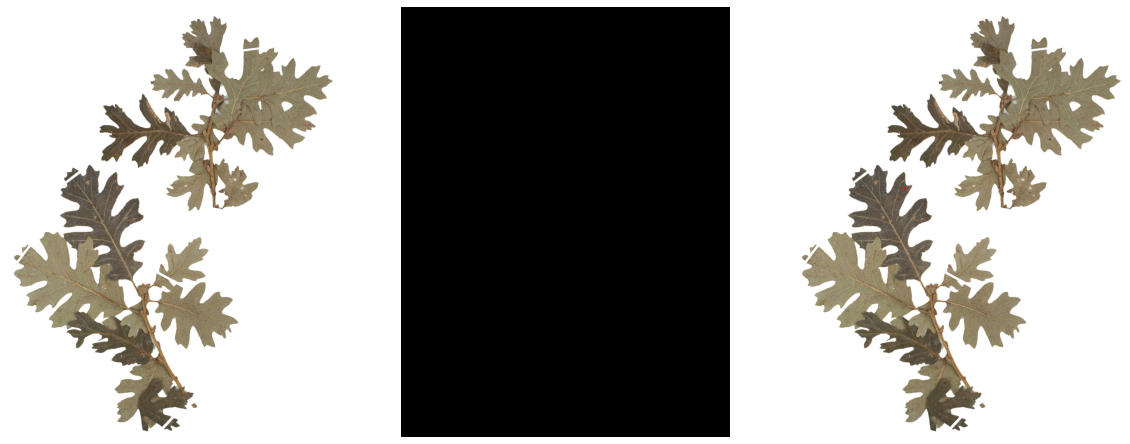






 76%|███████▋  | 29/38 [02:48<01:00,  6.68s/it]

quercus-lobata/00000102_1299701


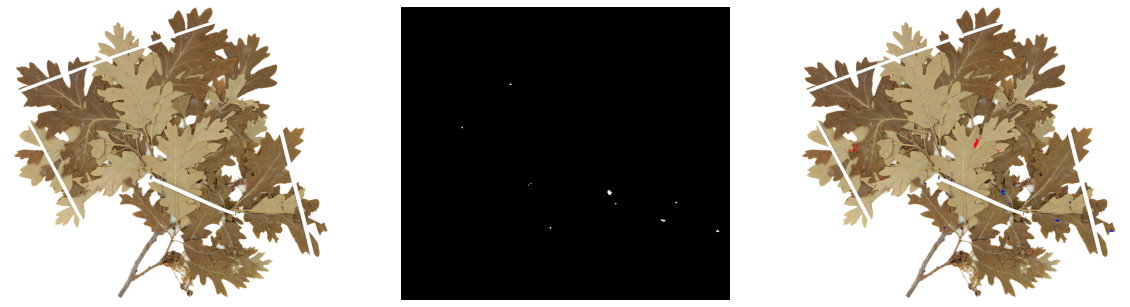






 79%|███████▉  | 30/38 [02:52<00:49,  6.13s/it]

quercus-lobata/00000305_1666643


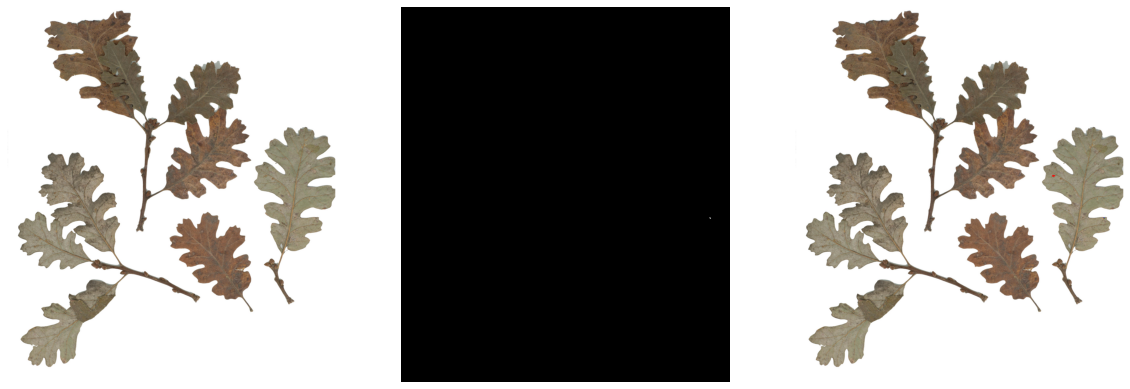






 82%|████████▏ | 31/38 [03:00<00:45,  6.52s/it]

quercus-lobata/00000035_312560


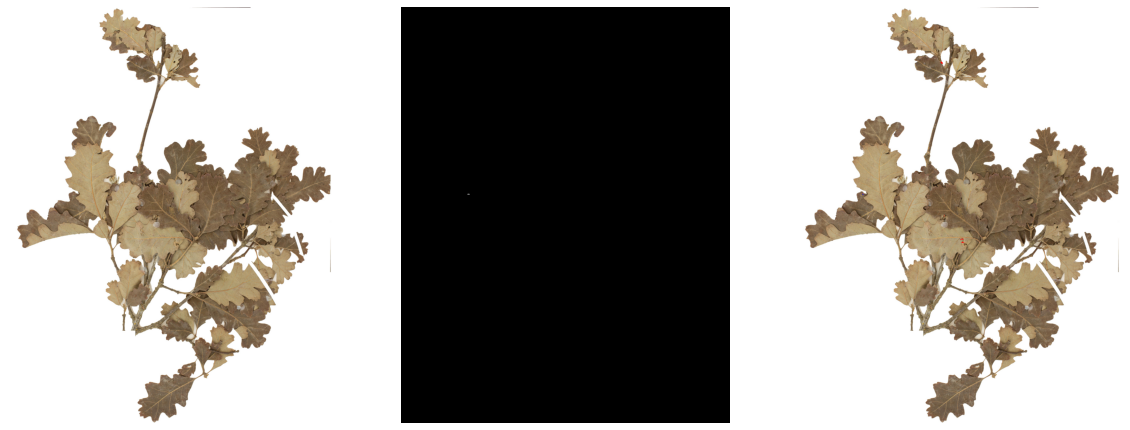






 84%|████████▍ | 32/38 [03:07<00:39,  6.63s/it]

quercus-lobata/00000384_3819210


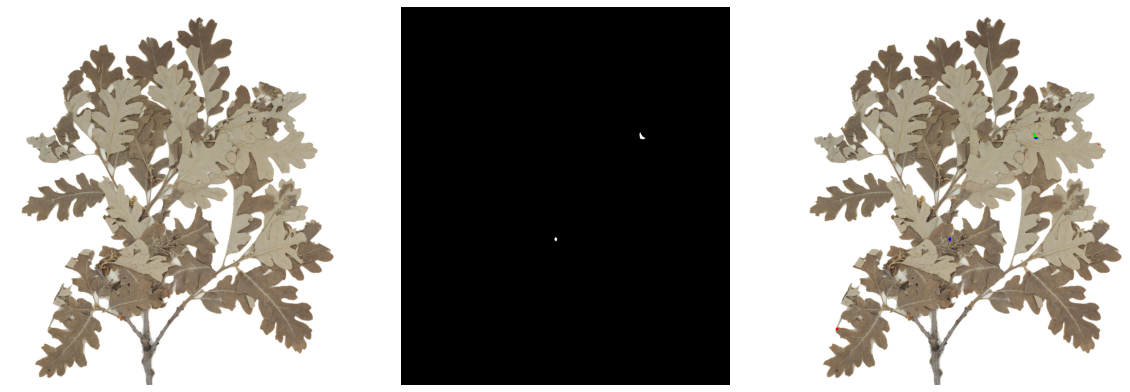






 87%|████████▋ | 33/38 [03:11<00:30,  6.06s/it]

quercus-lobata/00000361_3141702


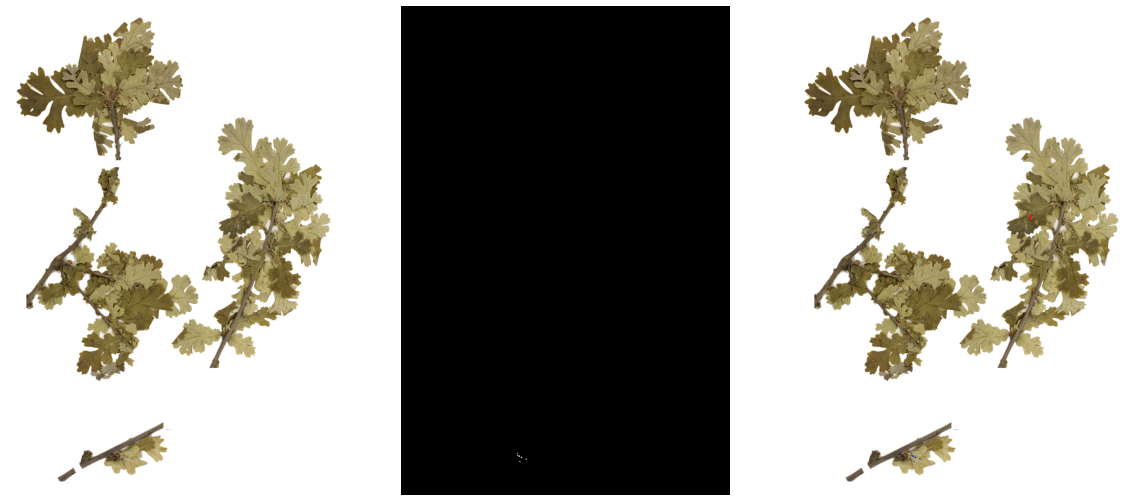






 89%|████████▉ | 34/38 [03:19<00:25,  6.37s/it]

quercus-lobata/00000143_1314777


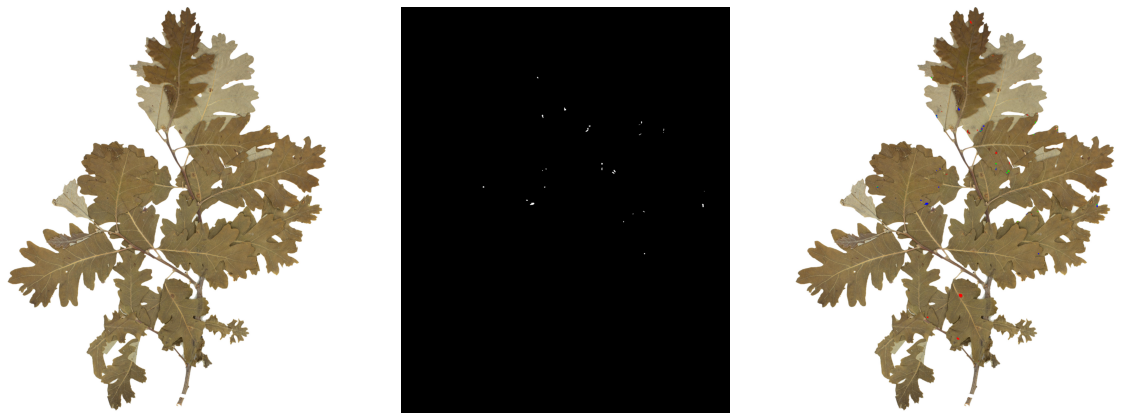






 92%|█████████▏| 35/38 [03:26<00:20,  6.69s/it]

quercus-lobata/00000303_1665574


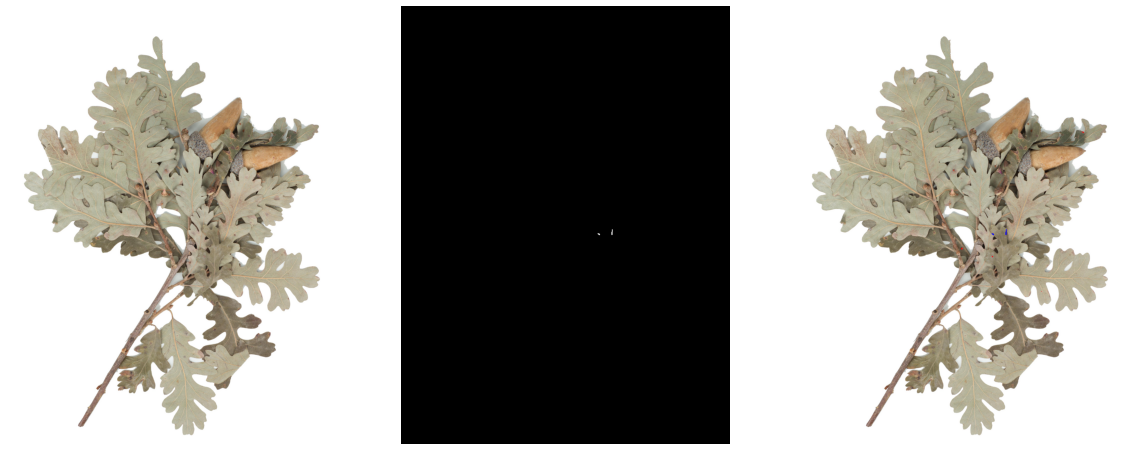






 95%|█████████▍| 36/38 [03:30<00:11,  5.87s/it]

quercus-lobata/00000302_1657887


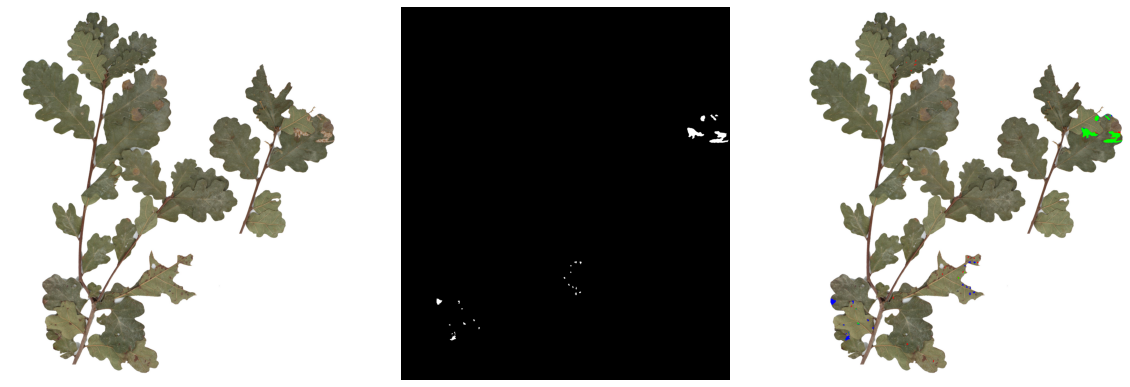






 97%|█████████▋| 37/38 [03:36<00:05,  5.84s/it]

quercus-lobata/00000005_202036


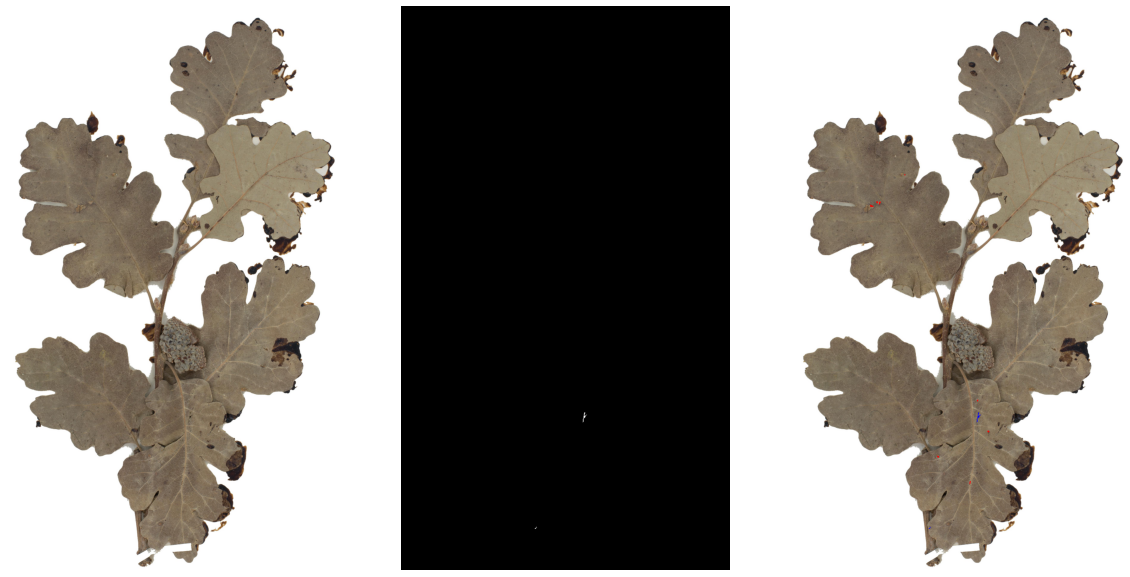






100%|██████████| 38/38 [03:40<00:00,  5.80s/it]


In [10]:
phase='validation'
epoch=1
data_type= 'ep300_ql_sk'#'ep300_ql_sk' #f'e{epoch}_al05' #f'e{epoch}_s1r95p05_mask', 'ep1_a001_b11_beta2_mar01'
partition=read_json('../../stats/partition_clean_tileW512H512M4_stage.json') 
root_leaves=Path('/usr/xtmp/xs75/leaves/datasets/leaves')
root_acts=Path('/usr/xtmp/xs75/leaves/datasets/acts/image')
labels_map=set_labels('../../stats/label_skel.json' )# ../../stats/label_file_common_binary.json' ../../stats/label_skel.json
# save_=True
save_=True
root=root_acts
pos_acts = []
neg_acts = []
id2paths = partition[phase]['images']
targets= [] #['quercus-bicolor-herbivory/00000389_4249426','quercus-bicolor-herbivory/00000495_26585']
# targets=['quercus-lobata/00000293_1619758','quercus-lobata/00000131_1314762',
#          'quercus-lobata/00000181_1314822','quercus-lobata/00000302_1657887',
#          'quercus-lobata/00000384_3819210','quercus-lobata/00000102_1299701']
# targets =[ 'quercus-lobata/00000131_1314762']

i = 0
for path in tqdm(glob(root/phase/f'*/{data_type}/*.npy')):
    id_ = os.path.join(path.split('/')[-3:][0], (path.split('/')[-4:][-1]).split('.')[0] )
#     if id_ not in targets:
#         continue
    if id_ not in id2paths.keys(): 
        continue
    print(id_)
    label, pl_label = read_image(root_leaves/id2paths[id_]['label'])
    image,_ = read_image(root_leaves/id2paths[id_]['image'])
    species,name = id_.split('/')
    for key, value in labels_map[species].items():
        label[label == int(key)] = value['number']

    leaf_mask, _ = read_image(root_leaves/id2paths[id_]['leaf_mask'])
    act = np.load(path)
    pos_acts = (act[np.logical_and(label!=0,leaf_mask)])
    neg_acts = (act[np.logical_and(label==0,leaf_mask)])

#     plt.figure(figsize=(20,6))
#     plt.subplot(1,2,1)
#     plt.title(f'{name}: His of z for the negatives when epoch={epoch}')
#     arr = np.array(neg_acts)
#     _ = plt.hist(arr,bins=300,density=False, align='mid')
#     plt.xlabel('z')

#     plt.subplot(1,2,2)
#     plt.title(f'{name}: His of z for the positives when epoch={epoch}')
#     arr = np.array(pos_acts)
#     _ = plt.hist(arr,bins=300,density=False, align='mid')
#     plt.xlabel('z')
#     plt.show()
    import numpy as np

    def sigmoid(x):  
        return np.exp(-np.logaddexp(0, -x))
#     prods = sigmoid(act)
#     preds = (prods >= 0.5).astype('bool')

    thres = -0
    index_neg_1 = np.logical_and(np.logical_and(label==0, act>=thres), leaf_mask)
    index_pos_1 = np.logical_and(np.logical_and(label!=0, act>=thres), leaf_mask)
    index_pos_0 = np.logical_and(np.logical_and(label!=0, act<thres),leaf_mask)

    img_red = image.copy()
    img_red[index_neg_1]=[255,0,0] #FP
#     img_red[index_pos_1]=[255,0,0]
    img_red[index_pos_0]=[0,0,255] #FN
    img_red[index_pos_1]=[0,255,0] #TP
    
    plt_samples([image,label,img_red], 1,3,figsize=(20,30),cmap='gray')
    plt.show()
    if save_:
        dir_ = Path(f'./imgs/{data_type}/{species}/{name}')
        try_create_dir(dir_)
        save_image(dir_/'img_original.jpeg', image)
        save_image(dir_/'label_common.png', label, pl_label)
        label, pl_label = read_image(root_leaves/id2paths[id_]['label'])
        save_image(dir_/'label_original.png', label, pl_label)
        save_image(dir_/'img_painted.jpeg', img_red)
        
#     if i>2:
#         break
    i+=1

In [177]:
# index_neg_1 = np.logical_and(label==0, act>0.8, act<1.1)
# index_pos_1 = np.logical_and(label!=0, act>0.8, act<1.1)

# img_red = image.copy()
# img_red[index_neg_1]=[255,0,0]
# img_red[index_pos_1]=[0,0,255]
# plt_samples([image,img_red], 1,2,figsize=(20,30))
# plt.show()

In [147]:
label, _ = read_image(root_leaves/id2paths[id_]['label'])

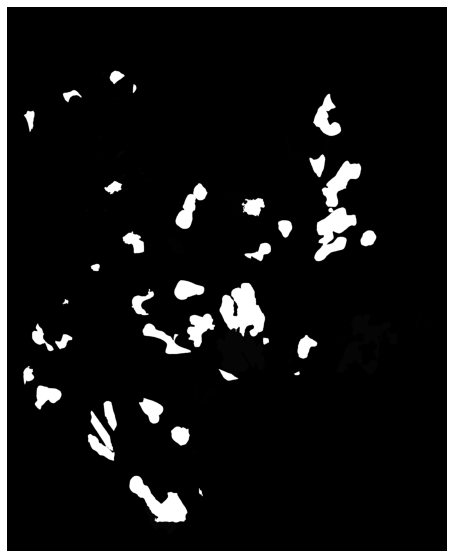

In [153]:
a = label.copy()
a[a==1]=255
plt_samples([a], 1,1,figsize=(10,10))